In [1]:
#importando as dependencias necessarias
import pandas as pd
import json, csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr
import itertools
import time, datetime, os

In [ ]:
#formatando o arquivo de logger para ser compativel com o pandas
#obs: o arquivo de logger sera sobreescrito (podendo nao ser necesssario executar essa celula para determinado arquivo)
dic = {'ID_smartwatch':[], 'dateTime':[], 'battery':[], 'fileSize':[], 'pressure':[], 'lux':[], 'heartRate':[],
         'ecg':[], 'ppg':[], 'saturation':[], 'accelerometerZ':[], 'accelerometerX':[],
         'accelerometerY':[], 'gyroscopeZ':[], 'gyroscopeX':[], 'gyroscopeY':[]}

for filename in os.listdir("loggers"):
    print(filename)
    with open('loggers/'+filename, 'r') as file:
        d = file.read()
        f = json.loads(d)
        for key in f:
            dic[key] = dic[key] + list(f[key][0][1:-1].split(', '))
        
dic['ID_smartwatch'] = dic['ID_smartwatch'][0]
with open('data/logger.json', 'w') as file:
    file.write(json.dumps(dic))

"""
with open('data/loggerECG.json', 'r+') as file:
    dic = file.read()
    f = json.loads(dic)
    for key in f:
        f[key] = list(f[key][0][1:-1].split(', '))

    for key in f:
        d = {}
        for i in range(len(f[key])):
            d[i] = f[key][i]
        f[key] = d
    file.seek(0)
    file.write(json.dumps(f))
    file.truncate()
"""

In [2]:
#para arquivos.bin
with open('loggers/satu.bin', 'r') as file:
    f = csv.reader(file)
    header = next(f)
    newHeader = [i.strip() for i in header[0:-1]]
    idSmart = header[-1][11:]
    print(newHeader, idSmart)

    with open('data/satu.csv', 'w') as file:
        w = csv.writer(file)
        w.writerow(newHeader)
        for row in f:
            w.writerow(row)

['dateTime', 'battery', 'fileSize', 'pressure', 'lux', 'heartRate', 'ecg', 'ppgGreen', 'ppgRed', 'ppgIR', 'saturation', 'accelerometerZ', 'accelerometerX', 'accelerometerY', 'gyroscopeZ', 'gyroscopeX', 'gyroscopeY'] 7ab504da804297cb


In [2]:
#definicao de variaveis
items = ['battery', 'fileSize', 'pressure', 'lux', 'heartRate',
         'ecg', 'ppg', 'saturation', 'accelerometerZ', 'accelerometerX',
         'accelerometerY', 'gyroscopeZ', 'gyroscopeX', 'gyroscopeY']
units = {'battery': 'bateria (%)',
             'fileSize': 'armazenamento (MB)',
             'pressure': 'pressao (hPa)',
             'lux': 'luminosidade (lux)',
             'heartRate': 'taxa de batimentos (bpm)',
             'ecg': 'ecg cru (mV)',
             'ppg': 'ppg cru (mV)',
             'saturation': 'oxigenacao crua (mV)',
             'accelerometerZ': 'aceleracao (m/s²)',
             'accelerometerX': 'aceleracao (m/s²)',
             'accelerometerY': 'aceleracao (m/s²)',
             'gyroscopeZ': 'giroscopio (rad/s)',
             'gyroscopeX': 'giroscopio (rad/s)',
             'gyroscopeY': 'giroscopio (rad/s)'}

In [3]:
#Processamento dos dados para arquivos json
df = pd.read_json('data/logger.json')
#removendo o id do smartwatch do dataframe
df.drop(['ID_smartwatch'], axis=1, inplace=True)
df.head()
#print(df)

,dateTime,battery,fileSize,pressure,lux,heartRate,ecg,ppg,saturation,accelerometerZ,accelerometerX,accelerometerY,gyroscopeZ,gyroscopeX,gyroscopeY
0,2022-02-23 01:51:42-03:00,96,0.000000,1014.3279,20,0,1772754,0,0,0.220267,-1.762132,9.710882,-1.367117,-0.001222,0.161268
1,2022-02-23 01:51:43-03:00,96,0.000424,1014.3047,12,0,-750102,0,0,-0.471658,-4.874595,7.970297,-0.091630,0.243124,0.021991
2,2022-02-23 01:51:43-03:00,96,0.000424,1014.3242,12,0,-745613,0,0,-0.744597,-4.592079,8.990228,-0.255342,-0.037874,-0.186925
3,2022-02-23 01:51:44-03:00,96,0.000424,1014.3318,12,0,-743236,0,0,-0.038307,-2.877830,8.999804,0.018326,-0.035430,-0.002443
4,2022-02-23 01:51:44-03:00,96,0.000424,1014.3342,12,0,-736800,0,0,-0.588974,-3.356671,8.784326,0.069639,-0.046426,0.018326


In [ ]:
#Processamento dos dados caso arquivo seja em csv
df = pd.read_csv('data/satu.csv')
df.head()

In [5]:
#visao geral dos dados (quantidade, media, desvio padrao, minimo, q1, mediana, q3 e maximo)
df.describe()

,battery,fileSize,pressure,lux,heartRate,ecg,ppg,saturation,accelerometerZ,accelerometerX,accelerometerY,gyroscopeZ,gyroscopeX,gyroscopeY
count,34385.000000,34385.000000,34385.000000,34385.000000,34385.000000,3.438500e+04,3.438500e+04,34385.0,34385.000000,34385.000000,34385.000000,34385.000000,34385.000000,34385.000000
mean,53.906936,0.592154,1013.726712,0.116097,71.471717,-6.291813e+05,2.704032e+06,0.0,-0.801328,-1.605878,1.776661,-0.001035,0.001140,-0.000247
std,25.218640,0.366024,0.300620,1.255798,28.841492,6.902806e+05,2.305585e+05,0.0,2.988043,4.681211,7.662098,0.326530,0.181564,0.209565
min,8.000000,0.000000,1013.239500,0.000000,0.000000,-2.800252e+06,0.000000e+00,0.0,-14.700398,-55.535904,-27.293900,-10.334619,-5.644395,-12.252735
25%,33.000000,0.269255,1013.454830,0.000000,56.000000,-5.451310e+05,2.585044e+06,0.0,-2.403779,-5.657499,-7.225701,-0.002443,-0.003665,-0.001222
50%,54.000000,0.570062,1013.694600,0.000000,60.000000,-3.872610e+05,2.646183e+06,0.0,-1.637634,0.023942,5.288792,0.000000,0.000000,0.000000
75%,76.000000,0.910304,1013.946040,0.000000,107.000000,-2.921980e+05,2.830511e+06,0.0,0.644040,1.587356,8.609549,0.002443,0.003665,0.001222
max,96.000000,1.258512,1014.439700,40.000000,129.000000,2.388773e+06,3.227346e+06,0.0,19.706675,29.309816,25.206156,15.239866,8.229576,5.987701


In [6]:
#checando a existencia de valores nulos/faltantes
#df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34385 entries, 0 to 34384
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype                                 
---  ------          --------------  -----                                 
 0   dateTime        34385 non-null  datetime64[ns, pytz.FixedOffset(-180)]
 1   battery         34385 non-null  int64                                 
 2   fileSize        34385 non-null  float64                               
 3   pressure        34385 non-null  float64                               
 4   lux             34385 non-null  int64                                 
 5   heartRate       34385 non-null  int64                                 
 6   ecg             34385 non-null  int64                                 
 7   ppg             34385 non-null  int64                                 
 8   saturation      34385 non-null  int64                                 
 9   accelerometerZ  34385 non-null  float64           

In [7]:
#convertendo datetime para valor numerico
time = []
y, mo, d = map(int, str(df['dateTime'][0])[0:10].split('-'))
h,m,s = map(int, str(df['dateTime'][0])[11:19].split(':'))
startingTime = datetime.datetime(y, mo, d, h, m, s).timestamp()

for val in range(len(df.dateTime)):
    v = str(df.dateTime[val])
    y, mo, d = map(int, v[0:10].split('-'))
    h,m,s = map(int, v[11:19].split(':'))
    ts = datetime.datetime(y, mo, d, h, m, s).timestamp()
    ts = ts - startingTime
    time.append(ts)
    
df.drop('dateTime', axis = 1, inplace=True)
df['dateTime'] = time
df.head()

,battery,fileSize,pressure,lux,heartRate,ecg,ppg,saturation,accelerometerZ,accelerometerX,accelerometerY,gyroscopeZ,gyroscopeX,gyroscopeY,dateTime
0,96,0.000000,1014.3279,20,0,1772754,0,0,0.220267,-1.762132,9.710882,-1.367117,-0.001222,0.161268,0.0
1,96,0.000424,1014.3047,12,0,-750102,0,0,-0.471658,-4.874595,7.970297,-0.091630,0.243124,0.021991,1.0
2,96,0.000424,1014.3242,12,0,-745613,0,0,-0.744597,-4.592079,8.990228,-0.255342,-0.037874,-0.186925,1.0
3,96,0.000424,1014.3318,12,0,-743236,0,0,-0.038307,-2.877830,8.999804,0.018326,-0.035430,-0.002443,2.0
4,96,0.000424,1014.3342,12,0,-736800,0,0,-0.588974,-3.356671,8.784326,0.069639,-0.046426,0.018326,2.0


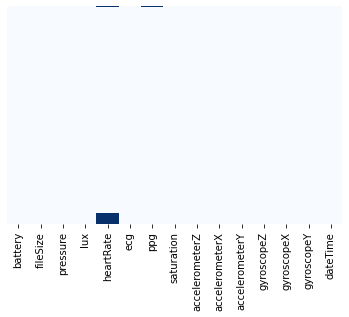

In [8]:
#substituindo leituras erroneas por NaN
df.ecg.replace(0, np.nan, inplace=True)
df.ppg.replace(0, np.nan, inplace=True)
df.heartRate.replace(0, np.nan, inplace=True)
hm = sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'Blues')
figure = hm.get_figure()    
figure.savefig('graphs/missing.png', bbox_inches='tight', dpi=800)

In [9]:
#substituindo os valores faltantes pela media da coluna (caso nao existam nao e necessario executar essa celula)
#obs: apenas valido para valores numericos
num_col = ['heartRate', 'ppg'] # lista com as colunas que possuem valores faltantes
for col in num_col:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.isna().sum()

battery           0
fileSize          0
pressure          0
lux               0
heartRate         0
ecg               0
ppg               0
saturation        0
accelerometerZ    0
accelerometerX    0
accelerometerY    0
gyroscopeZ        0
gyroscopeX        0
gyroscopeY        0
dateTime          0
dtype: int64

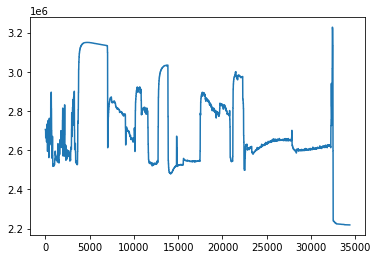

In [11]:
#visualizando as leituras de cada variavel
y = df.ppg
x = range(y.size)
plt.plot(x,y)

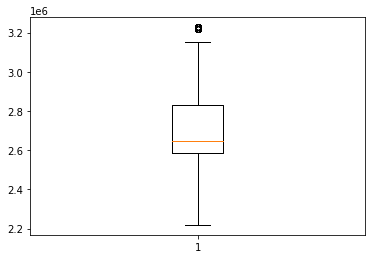

In [12]:
y = list(df.ppg)
plt.boxplot(y)
plt.savefig('graphs/boxplot2.png', bbox_inches='tight')

In [13]:
#calculando a covariancia entre variaveis
covariance = np.cov([df.ecg, df.heartRate, df.lux])
print(covariance)

[[ 4.76487239e+11 -7.93292419e+06 -4.28512113e+03]
 [-7.93292419e+06  5.41029322e+02  7.17164954e-01]
 [-4.28512113e+03  7.17164954e-01  1.57702828e+00]]


In [14]:
#normalizando a covariancia para que se torne interpretavel(correlacao de pearson)
#metodo mais apropriado para distrubuicoes gaussianas
items = [df.ecg, df.heartRate, df.lux]
for pair in itertools.combinations(items, 2):
    pCorr, _ = pearsonr(*pair)
    print(f"A correlacao de Pearson entre {pair[0].name} e {pair[1].name} eh: {pCorr:.3f}")

A correlacao de Pearson entre ecg e heartRate eh: -0.494
A correlacao de Pearson entre ecg e lux eh: -0.005
A correlacao de Pearson entre heartRate e lux eh: 0.025


In [15]:
#interpretando a covariancia pela correlacao de spearman (para distribuicoes nao gaussianas)
items = [df.ecg, df.heartRate, df.lux]
for pair in itertools.combinations(items, 2):
    sCorr, _ = spearmanr(*pair)
    print(f"A correlacao de Spearman entre {pair[0].name} e {pair[1].name} eh: {sCorr:.3f}")

A correlacao de Spearman entre ecg e heartRate eh: -0.140
A correlacao de Spearman entre ecg e lux eh: -0.127
A correlacao de Spearman entre heartRate e lux eh: 0.058


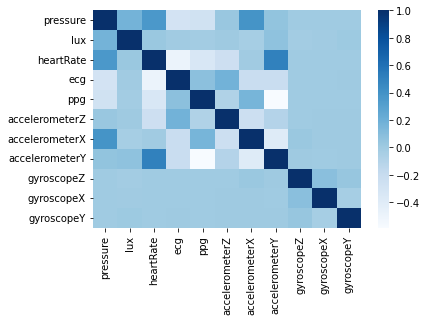

In [16]:
ddf = df.copy()
ddf.drop(['dateTime'], axis=1, inplace=True)
ddf.drop(['fileSize'], axis=1, inplace=True)
ddf.drop(['saturation'], axis=1, inplace=True)
ddf.drop(['battery'], axis=1, inplace=True)
cor = sns.heatmap(ddf.corr(),cmap='Blues',annot=False)
figure = cor.get_figure()    
figure.savefig('graphs/correlation.png', bbox_inches='tight', dpi=800)

In [17]:
#normalizacao por maximum absolute scaling
def maxAbsoluteScale(df):
    scaledDf = df.copy()
    #Divide cada valor de uma coluna pelo valor maximo da mesma
    for column in scaledDf.columns:
        #as colunas de horario, tamanho de arquivo e bateria sao desconsideradas
        if column != 'datetime' and column != 'size' and column != 'battery':
            scaledDf[column] = scaledDf[column]  / scaledDf[column].abs().max()
    #retorna os valores em uma escala de -1 a 1
    return scaledDf

In [18]:
#normalizacao por min-max
def minMaxScale(df):
    scaledDf = df.copy()
    #aplicando a formula do min-max (x-min / range)
    for column in scaledDf.columns:
        #as colunas de horario, tamanho de arquivo e bateria sao desconsideradas
        if column != 'datetime' and column != 'size' and column != 'battery':
            scaledDf[column] = (scaledDf[column] - scaledDf[column].min()) / (scaledDf[column].max() - scaledDf[column].min())
    #retorna os valores em uma escala entre 0 e 1
    return scaledDf

In [19]:
#normalizacao por z-score (standardize)
def standardize(df):
    scaledDf = df.copy()
    #aplicando a formula do z-score (x-media / desvio padrao)
    for column in scaledDf.columns:
        #as colunas de horario, tamanho de arquivo e bateria sao desconsideradas
        if column != 'datetime' and column != 'size' and column != 'battery':
            scaledDf[column] = (scaledDf[column] - scaledDf[column].mean()) / scaledDf[column].std()
    #retorna os valores com media = 0 e desvio padrao = 1
    return scaledDf

In [20]:
#normalizacao por robust scaling (ideal para dados com muitos outliers)
def robustScaling(df):
    scaledDf = df.copy()
    #aplicando a formula do robust scaling (x-mediana/(q3-q2)*) *interquartille range
    for column in scaledDf.columns:
        #as colunas de horario, tamanho de arquivo e bateria sao desconsideradas
        if column != 'datetime' and column != 'size' and column != 'battery':
            scaledDf[column] = (scaledDf[column] - scaledDf[column].median())  / (scaledDf[column].quantile(0.75) - scaledDf[column].quantile(0.25))
    return scaledDf

In [21]:
#calculando o numero de outliers
def outlierCount(df, var):
    q1= df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqRange = q3 - q1
    maxVal = q3 + 1.5 * iqRange
    minVal = q1 - 1.5 * iqRange
    count = len(df[(df[var] < minVal)]) + len(df[(df[var] > maxVal)])
    return count, minVal, maxVal

print(outlierCount(df, 'ecg'))

(4679, -924530.5, 87201.5)


In [22]:
#tratando outliers
def removeOutliers(df, var):
    count, minVal, maxVal = outlierCount(df, var)
    newDf = df[(df[var] > minVal) & (df[var] < maxVal)]
    return newDf
    
noOutliers = removeOutliers(df, 'ecg')
print(outlierCount(noOutliers, 'ecg'))

(36, -782953.5, 10352.5)


In [23]:
maxAbsDf = maxAbsoluteScale(df)
minMaxDf = minMaxScale(df)
zScoreDf = standardize(df)
robustDf = robustScaling(df)

{'whiskers': [<matplotlib.lines.Line2D at 0x1330bd2dbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x1330ad4a1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1330bd2d910>],
 'medians': [<matplotlib.lines.Line2D at 0x1330ad4a760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1330ad4aa30>],
 'means': []}

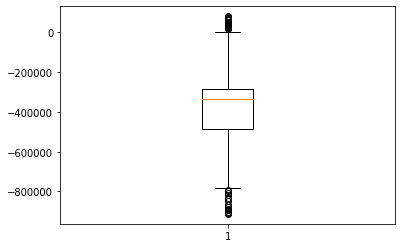

In [24]:
y = list(noOutliers.ecg)
plt.boxplot(y)

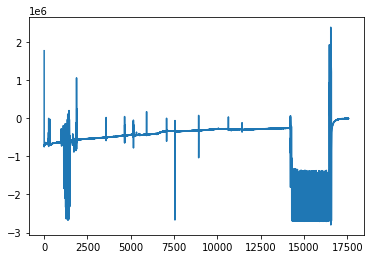

In [25]:
y = df.ecg
x = df.dateTime
plt.plot(x,y)

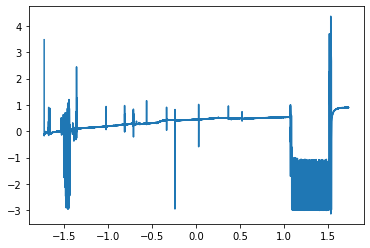

In [26]:
y = zScoreDf.ecg
x = zScoreDf.dateTime
plt.plot(x,y)

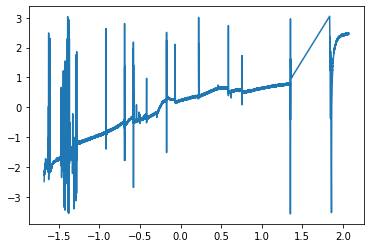

In [27]:
zScoreNoOut = standardize(noOutliers)
y = zScoreNoOut.ecg
x = zScoreNoOut.dateTime
plt.plot(x,y)

In [28]:
#checando a correlacao apos processamento
items = [zScoreNoOut.ecg, zScoreNoOut.heartRate, zScoreNoOut.lux]
for pair in itertools.combinations(items, 2):
    sCorr, _ = spearmanr(*pair)
    print(f"A correlacao de Spearman entre {pair[0].name} e {pair[1].name} eh: {sCorr:.3f}")

A correlacao de Spearman entre ecg e heartRate eh: 0.215
A correlacao de Spearman entre ecg e lux eh: -0.188
A correlacao de Spearman entre heartRate e lux eh: 0.100
